In [149]:
# Initial imports
import os
import requests
from MCForecastTools import MCSimulation
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px


%matplotlib inline

In [150]:
load_dotenv()

True

In [151]:
# Set Alpaca API key and secret
year=252
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [152]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-31', tz='America/New_York').isoformat()

In [153]:
# Get 5 years' worth of historical data for "Heavy Hitters" AAPL, MSFT,T, GOOG, GOOGL, AMZN, META, XOM
# Set timeframe to "1Day"
timeframe = "1Day"


# Set the ticker information
heavy_hitters = ["AAPL","MSFT","T","GOOG","GOOGL","AMZN","META","SPY","XOM"]


hh_5_year = alpaca.get_bars(
    heavy_hitters,
    timeframe,
    start=start_date,
    end=end_date
).df

In [154]:
# Reorganize the DataFrame
# Separate ticker data
AAPL=hh_5_year[hh_5_year['symbol']=='AAPL'].drop('symbol',axis=1)
MSFT=hh_5_year[hh_5_year['symbol']=='MSFT'].drop('symbol',axis=1)
T=hh_5_year[hh_5_year['symbol']=='T'].drop('symbol',axis=1)
GOOG=hh_5_year[hh_5_year['symbol']=='GOOG'].drop('symbol',axis=1)
GOOGL=hh_5_year[hh_5_year['symbol']=='GOOGL'].drop('symbol',axis=1)
AMZN=hh_5_year[hh_5_year['symbol']=='AMZN'].drop('symbol',axis=1)
META=hh_5_year[hh_5_year['symbol']=='META'].drop('symbol',axis=1)
SPY=hh_5_year[hh_5_year['symbol']=='SPY'].drop('symbol',axis=1)
XOM=hh_5_year[hh_5_year['symbol']=='XOM'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
hh_5_year = pd.concat([AAPL, MSFT,T,GOOG,GOOGL,AMZN,META,SPY,XOM],axis=1, keys=['AAPL','MSFT','T','GOOG','GOOGL','AMZN','META','SPY','XOM'])
hh_5_year.head()


AAPL                                      \
                              open      high     low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  167.900  169.6499  166.94  169.04  36070445   
2017-11-01 04:00:00+00:00  169.870  169.9400  165.61  166.89  33638072   
2017-11-02 04:00:00+00:00  167.640  168.5000  165.28  168.11  41394328   
2017-11-03 04:00:00+00:00  174.000  174.2600  171.12  172.50  59402471   
2017-11-06 05:00:00+00:00  172.365  174.9900  171.72  174.25  35026850   

                                                    MSFT                  ...  \
                          trade_count        vwap   open   high      low  ...   
timestamp                                                                 ...   
2017-10-31 04:00:00+00:00      199384  168.609022  84.36  84.36  83.1100  ...   
2017-11-01 04:00:00+00:00      209941  167.188415  83.68  83.76  82.8800  ...   
2017-11-02 04:00:00+00:00      249912  168.444532  83.35  84.46  83.1200  ...   
2017-11-03 04:00:00+00:00      336014  172.719018  84.08  84.54  83.4000  ...   
2017-11-06 05:00:00+00:00      194183  173.981439  84.20  84.70  84.0825  ...   

                                SPY                            XOM          \
                             volume trade_count        vwap   open    high   
timestamp                                                                    
2017-10-31 04:00:00+00:00  60678916      162728  257.164535  83.65  83.680   
2017-11-01 04:00:00+00:00  54263336      193085  257.717880  83.39  83.940   
2017-11-02 04:00:00+00:00  56449535      217328  257.251675  83.60  83.705   
2017-11-03 04:00:00+00:00  62908639      189765  258.119308  83.42  83.640   
2017-11-06 05:00:00+00:00  54815449      130424  258.660092  83.30  83.870   

                                                                         
                             low  close   volume trade_count       vwap  
timestamp                                                                
2017-10-31 04:00:00+00:00  83.17  83.35  9754213       43427  83.397699  
2017-11-01 04:00:00+00:00  83.26  83.87  9429983       45536  83.734944  
2017-11-02 04:00:00+00:00  82.91  83.53  7785410       43863  83.389946  
2017-11-03 04:00:00+00:00  83.16  83.18  6903526       37481  83.321913  
2017-11-06 05:00:00+00:00  83.06  83.75  9276669       46209  83.560493  

[5 rows x 63 columns]

In [155]:
# Create and empty DataFrame for closing prices
hh_closing_prices = pd.DataFrame()

# Fetch the closing prices of Heavy Hitters, 
hh_closing_prices["AAPL"] = hh_5_year["AAPL"]["close"]
hh_closing_prices["MSFT"] = hh_5_year["MSFT"]["close"]
hh_closing_prices["T"] = hh_5_year["T"]["close"]
hh_closing_prices["GOOG"] = hh_5_year["GOOG"]["close"]
hh_closing_prices["GOOGL"] = hh_5_year["GOOGL"]["close"]
hh_closing_prices["AMZN"] = hh_5_year["AMZN"]["close"]
hh_closing_prices["META"] = hh_5_year["META"]["close"]
hh_closing_prices["SPY"] = hh_5_year["SPY"]["close"]
hh_closing_prices["XOM"] = hh_5_year["XOM"]["close"]
# Drop the time component of the date
hh_closing_prices.index = hh_closing_prices.index.date

# Display sample data
hh_closing_prices.head(10)

,AAPL,MSFT,T,GOOG,GOOGL,AMZN,META,SPY,XOM
2017-10-31,169.04,83.18,33.65,1016.64,1033.040,1105.28,180.06,257.1200,83.35
2017-11-01,166.89,83.18,33.55,1025.50,1042.595,1103.68,182.66,257.5000,83.87
2017-11-02,168.11,84.05,33.17,1025.58,1042.970,1094.22,178.92,257.6200,83.53
2017-11-03,172.50,84.14,33.30,1032.48,1049.990,1111.60,178.92,258.4500,83.18
2017-11-06,174.25,84.47,32.86,1025.90,1042.680,1120.66,180.17,258.8100,83.75
2017-11-07,174.81,84.27,33.07,1033.33,1052.390,1123.17,180.25,258.7000,83.58
2017-11-08,176.24,84.56,33.44,1039.85,1058.290,1132.88,179.56,259.1100,83.47
2017-11-09,175.88,84.09,34.00,1031.26,1047.720,1129.13,179.30,258.1908,83.97
2017-11-10,174.67,83.87,34.22,1028.07,1044.150,1125.35,178.46,258.1000,82.94
2017-11-13,173.97,83.93,34.17,1025.75,1041.200,1129.17,178.77,258.3400,82.89


In [156]:
# Slice Heavy Hitters Portfolio
hh_portfolio = hh_closing_prices[['AAPL','MSFT','T','GOOG','GOOGL','AMZN','META','SPY','XOM']].pct_change()

portfolio_std = hh_closing_prices[['AAPL','MSFT','T','GOOG','GOOGL','AMZN','META','SPY','XOM']].std()
hh_portfolio.dropna(inplace=True)
hh_portfolio

,AAPL,MSFT,T,GOOG,GOOGL,AMZN,META,SPY,XOM
2017-11-01,-0.012719,0.000000,-0.002972,0.008715,0.009249,-0.001448,0.014440,0.001478,0.006239
2017-11-02,0.007310,0.010459,-0.011326,0.000078,0.000360,-0.008571,-0.020475,0.000466,-0.004054
2017-11-03,0.026114,0.001071,0.003919,0.006728,0.006731,0.015883,0.000000,0.003222,-0.004190
2017-11-06,0.010145,0.003922,-0.013213,-0.006373,-0.006962,0.008150,0.006986,0.001393,0.006853
2017-11-07,0.003214,-0.002368,0.006391,0.007242,0.009313,0.002240,0.000444,-0.000425,-0.002030
...,...,...,...,...,...,...,...,...,...
2022-10-25,0.019338,0.013792,0.010280,0.019035,0.019118,0.006510,0.060052,0.015969,-0.006754
2022-10-26,-0.019627,-0.077156,0.025438,-0.096350,-0.091405,-0.040962,-0.055923,-0.007534,0.011900
2022-10-27,-0.030465,-0.019756,-0.006064,-0.023413,-0.028547,-0.040636,-0.245571,-0.005340,0.003827
2022-10-28,0.075552,0.040221,0.024958,0.042981,0.044134,-0.068043,0.012865,0.023791,0.029289


<AxesSubplot: >

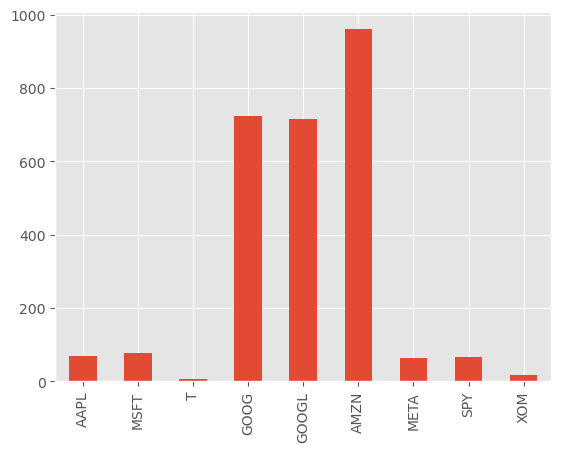

In [157]:
portfolio_std.plot(kind='bar')

In [158]:
hh_portfolio.describe()

,AAPL,MSFT,T,GOOG,GOOGL,AMZN,META,SPY,XOM
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000622,0.001000,-0.000343,-0.000056,-0.000070,-0.000039,-0.000157,0.000410,0.000448
std,0.029392,0.019160,0.016807,0.033029,0.033042,0.034607,0.026635,0.013085,0.021075
min,-0.741522,-0.147464,-0.186827,-0.951267,-0.951229,-0.949003,-0.263901,-0.107828,-0.122248
25%,-0.008482,-0.007879,-0.007530,-0.007531,-0.008034,-0.009587,-0.011466,-0.004892,-0.010304
50%,0.000922,0.001094,0.000448,0.001072,0.000995,0.001367,0.000414,0.000921,0.000153
75%,0.012291,0.010819,0.007113,0.010690,0.010546,0.011398,0.013214,0.006888,0.010873
max,0.119808,0.142268,0.079211,0.104485,0.096202,0.135359,0.176138,0.086761,0.126868


<AxesSubplot: >

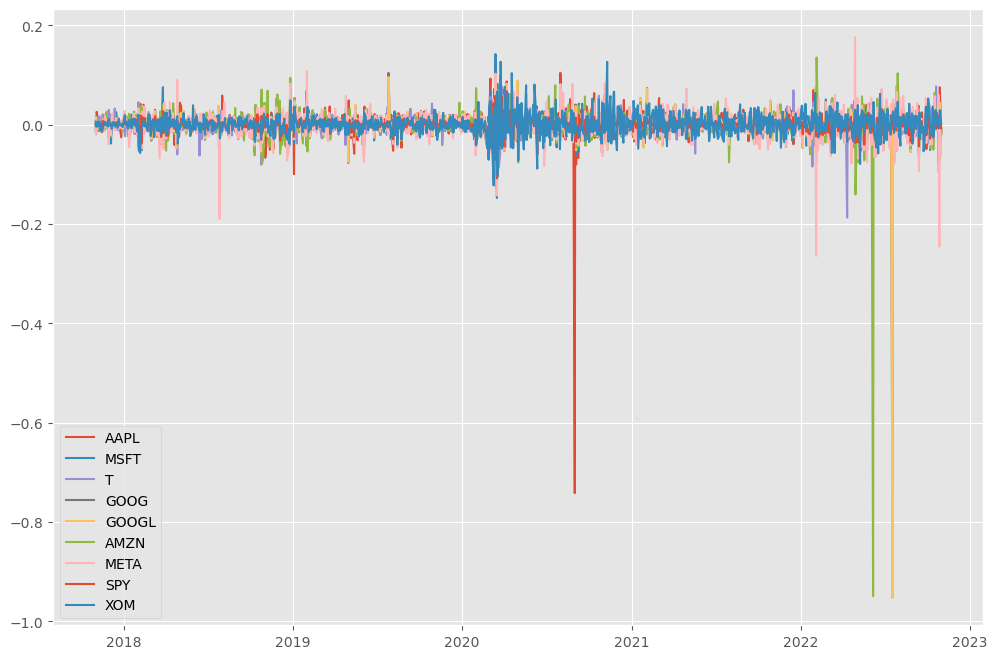

In [159]:
# Plot the daily returns
hh_return_plot = hh_portfolio.plot(figsize=(12,8))

hh_return_plot

CALCULATE AND PLOT CUMULATIVE RETURNS OF ALL PORTFOLIOS

In [160]:
# Calculate Cumulative returns
HH_cuml=((hh_portfolio+1).cumprod())
HH_cuml

,AAPL,MSFT,T,GOOG,GOOGL,AMZN,META,SPY,XOM
2017-11-01,0.987281,1.000000,0.997028,1.008715,1.009249,0.998552,1.014440,1.001478,1.006239
2017-11-02,0.994498,1.010459,0.985736,1.008794,1.009612,0.989993,0.993669,1.001945,1.002160
2017-11-03,1.020469,1.011541,0.989599,1.015581,1.016408,1.005718,0.993669,1.005173,0.997960
2017-11-06,1.030821,1.015509,0.976523,1.009108,1.009332,1.013915,1.000611,1.006573,1.004799
2017-11-07,1.034134,1.013104,0.982764,1.016417,1.018731,1.016186,1.001055,1.006145,1.002759
...,...,...,...,...,...,...,...,...,...
2022-10-25,0.901207,3.013465,0.525706,0.103213,0.101138,0.109113,0.763690,1.497044,1.270306
2022-10-26,0.883519,2.780957,0.539079,0.093268,0.091894,0.104643,0.720982,1.485765,1.285423
2022-10-27,0.856602,2.726016,0.535810,0.091084,0.089271,0.100391,0.543930,1.477831,1.290342
2022-10-28,0.921320,2.835658,0.549183,0.094999,0.093210,0.093560,0.550927,1.512990,1.328134


<AxesSubplot: ylabel='Density'>

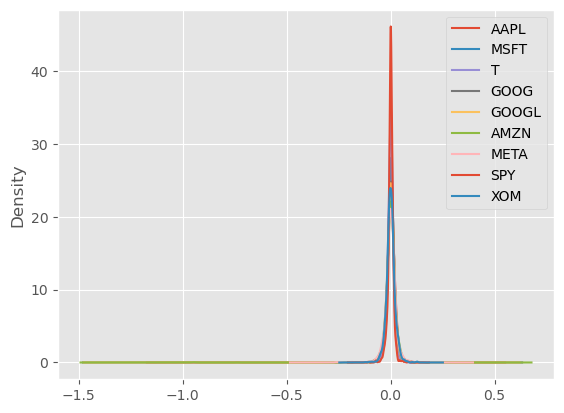

In [161]:
hh_portfolio.plot.density()

<AxesSubplot: >

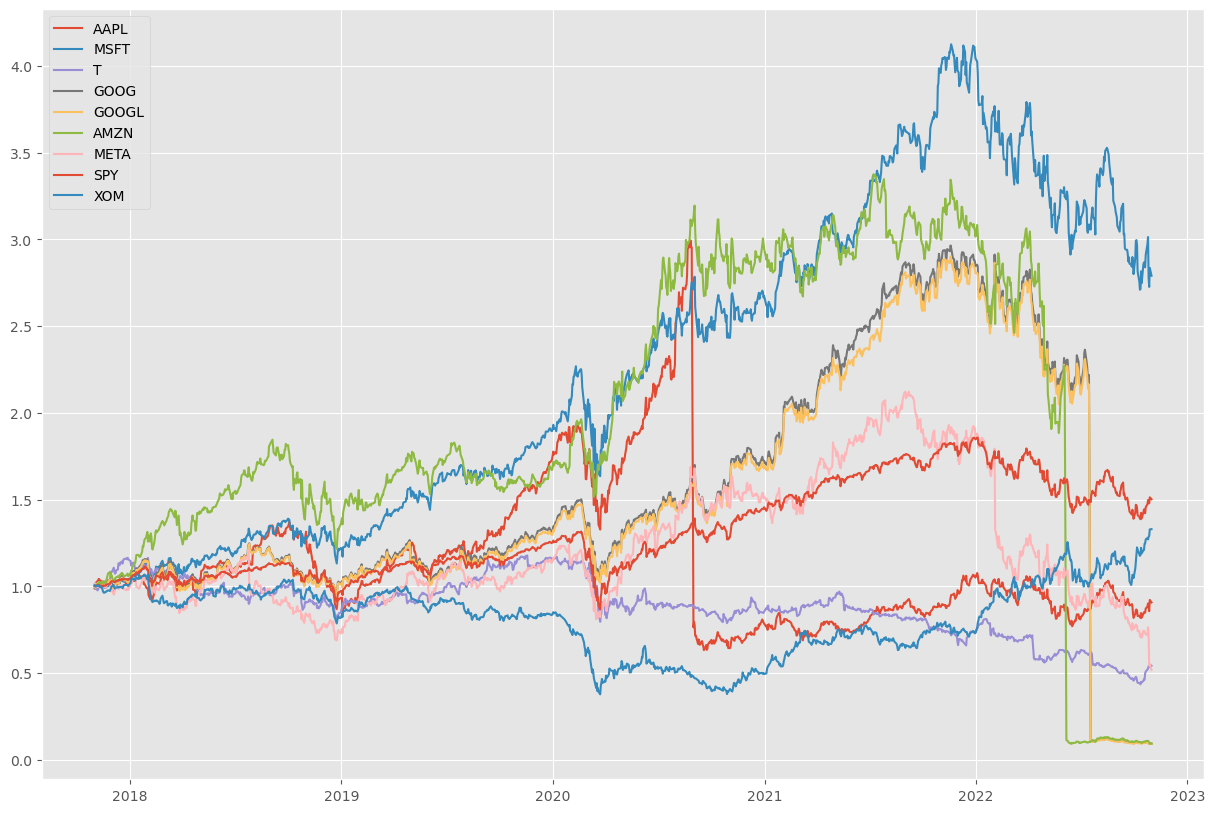

In [162]:
# Plot Cumulative returns

hh_cumulative_returns_plot = HH_cuml.plot(figsize=(15,10))

hh_cumulative_returns_plot

Risk Analysis
Determine the risk of each portfolio:

Create a box plot for Heavy Hitters and S&P 500 portfolios
Calculate the standard deviation for Heavy Hitters portfolio
Determine whether Heavy Hitters portfolio is riskier than the S&P 500
Calculate the Annualized Standard Deviation

<AxesSubplot: >

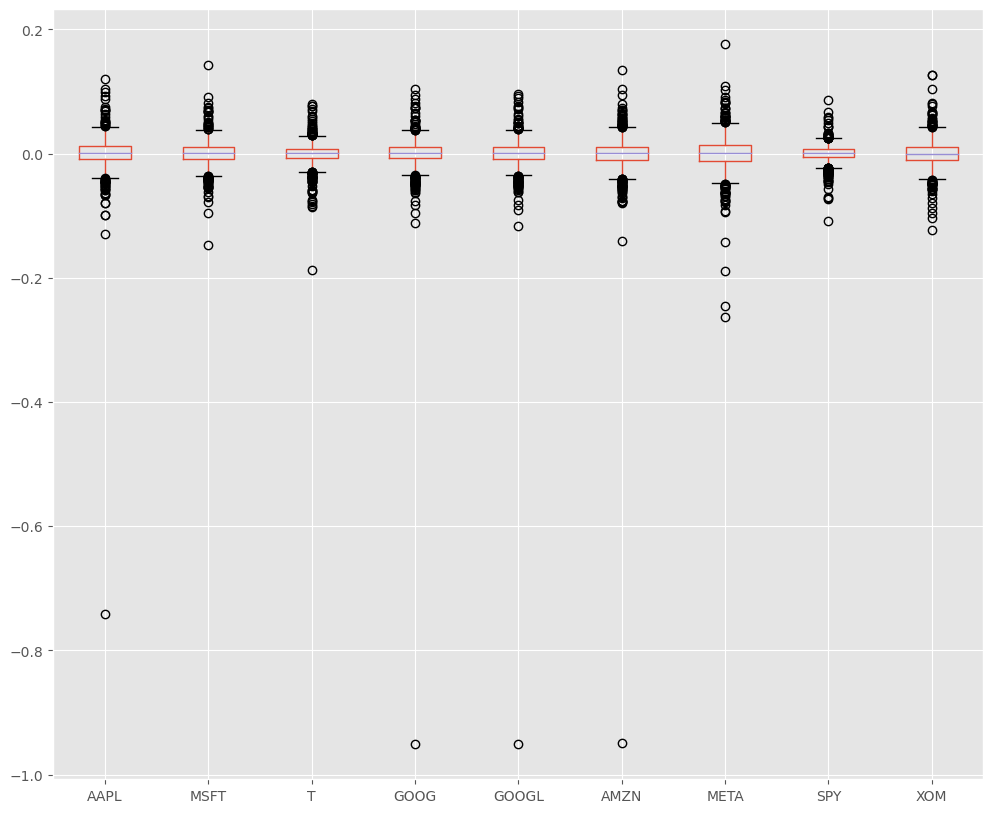

In [163]:
# Create boxplot for Heavy Hitters Portfolio
hh_portfolio.boxplot(figsize=(12,10))

Calculate Standard Deviations and determine risks versus S&P 500

In [164]:
# Calculate the standard deviations 
#False enables up to sort from the most volatile to the lest volatile
hh_std = hh_portfolio.std()
hh_std = hh_std.sort_values(ascending = False)
hh_std

AMZN     0.034607
GOOGL    0.033042
GOOG     0.033029
AAPL     0.029392
META     0.026635
XOM      0.021075
MSFT     0.019160
T        0.016807
SPY      0.013085
dtype: float64

In [165]:
#Create Summary Statistics
hh_summary = hh_portfolio.describe()
hh_summary

,AAPL,MSFT,T,GOOG,GOOGL,AMZN,META,SPY,XOM
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000622,0.001000,-0.000343,-0.000056,-0.000070,-0.000039,-0.000157,0.000410,0.000448
std,0.029392,0.019160,0.016807,0.033029,0.033042,0.034607,0.026635,0.013085,0.021075
min,-0.741522,-0.147464,-0.186827,-0.951267,-0.951229,-0.949003,-0.263901,-0.107828,-0.122248
25%,-0.008482,-0.007879,-0.007530,-0.007531,-0.008034,-0.009587,-0.011466,-0.004892,-0.010304
50%,0.000922,0.001094,0.000448,0.001072,0.000995,0.001367,0.000414,0.000921,0.000153
75%,0.012291,0.010819,0.007113,0.010690,0.010546,0.011398,0.013214,0.006888,0.010873
max,0.119808,0.142268,0.079211,0.104485,0.096202,0.135359,0.176138,0.086761,0.126868


In [166]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = hh_std * year**(1/2)
annual_std

AMZN     0.549371
GOOGL    0.524532
GOOG     0.524323
AAPL     0.466587
META     0.422811
XOM      0.334553
MSFT     0.304163
T        0.266808
SPY      0.207713
dtype: float64

<AxesSubplot: >

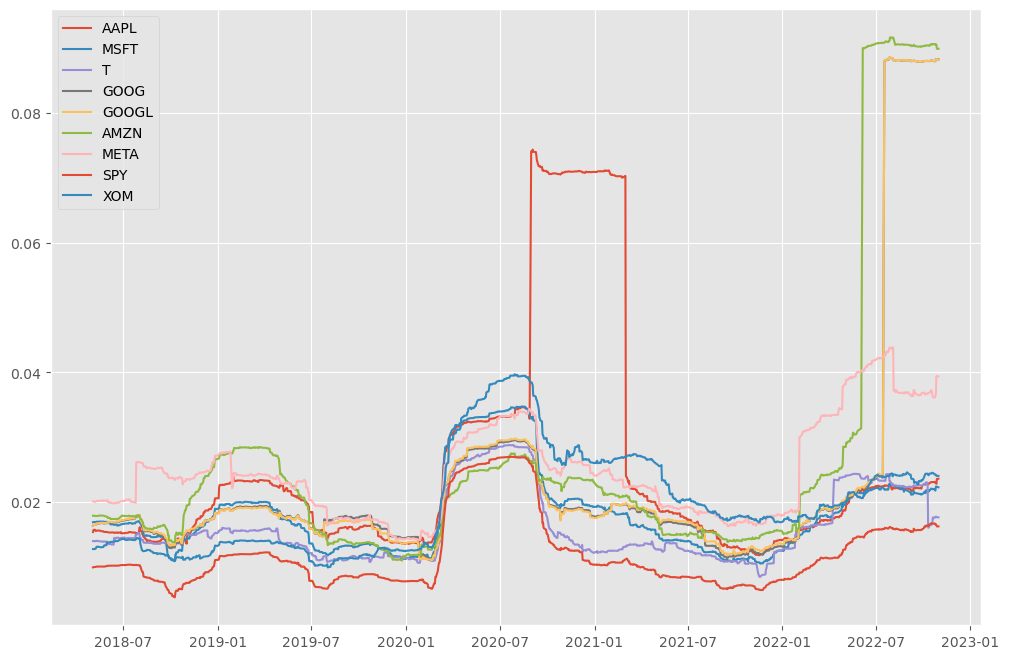

In [167]:
hh_portfolio.rolling(window=126).std().plot.line(figsize=(12,8))
#rolling window of 6 months standard deviation of all of our stocks

<AxesSubplot: >

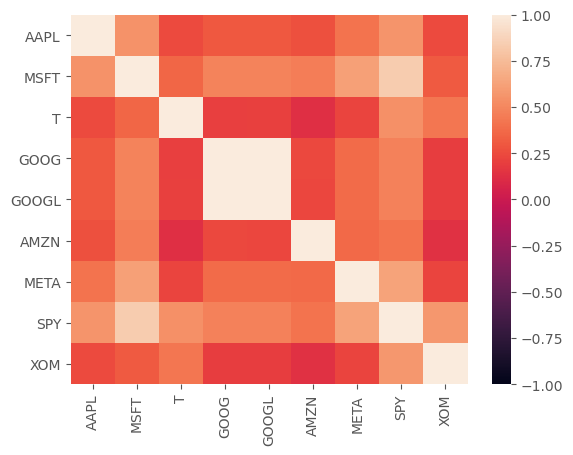

In [190]:
Correlation=hh_portfolio.corr().copy()
sns.heatmap(Correlation, vmin=-1, vmax=1)

In [189]:
APPL_cov=hh_portfolio['AAPL'].cov(hh_portfolio['SPY'])
MSFT_cov=hh_portfolio['MSFT'].cov(hh_portfolio['SPY'])
T_cov=hh_portfolio['T'].cov(hh_portfolio['SPY'])
GOOG_cov=hh_portfolio['GOOG'].cov(hh_portfolio['SPY'])
GOOGL_cov=hh_portfolio['GOOGL'].cov(hh_portfolio['SPY'])
AMZN_cov=hh_portfolio['AMZN'].cov(hh_portfolio['SPY'])
META_cov=hh_portfolio['META'].cov(hh_portfolio['SPY'])
XOM_cov=hh_portfolio['XOM'].cov(hh_portfolio['SPY'])


In [ ]:
variance=hh_portfolio['SPY'].var()
variance

0.00017120976283168158

In [170]:
beta=APPL_cov/variance
beta

1.2474292654647372

<AxesSubplot: >

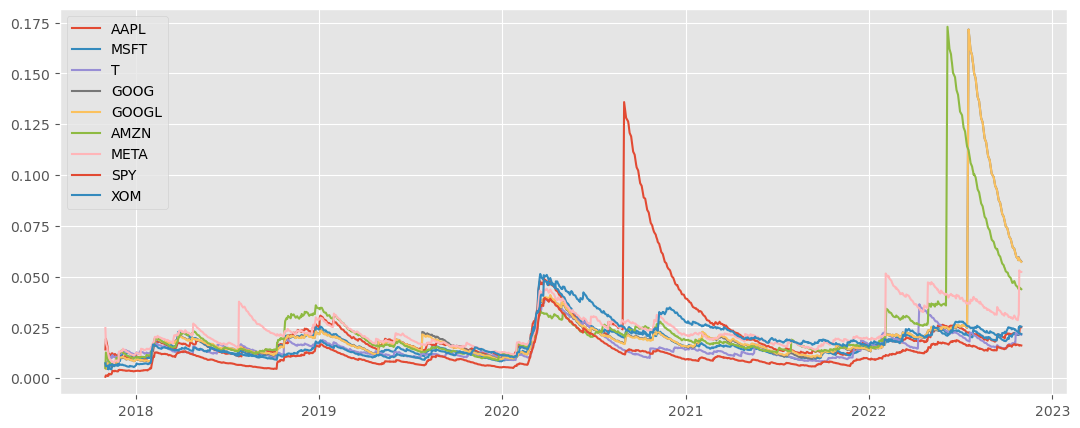

In [171]:
hh_portfolio.ewm(halflife=21).std().plot(figsize=(13,5))

In [172]:
Sharpe=(hh_portfolio.mean()*year)/(hh_portfolio.std()*np.sqrt(year))
Sharpe

AAPL     0.335878
MSFT     0.828435
T       -0.324292
GOOG    -0.026882
GOOGL   -0.033618
AMZN    -0.017765
META    -0.093453
SPY      0.496866
XOM      0.337516
dtype: float64

<AxesSubplot: title={'center': 'Sharpe Ratios'}>

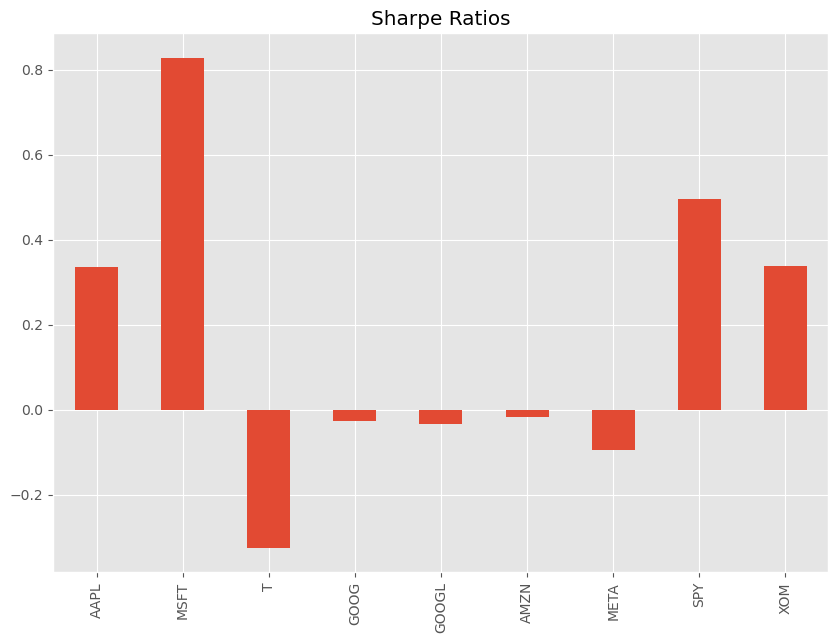

In [173]:
Sharpe.plot.bar(title='Sharpe Ratios',figsize=(10,7))


Text(0, 0.5, 'Sortino Ratio')

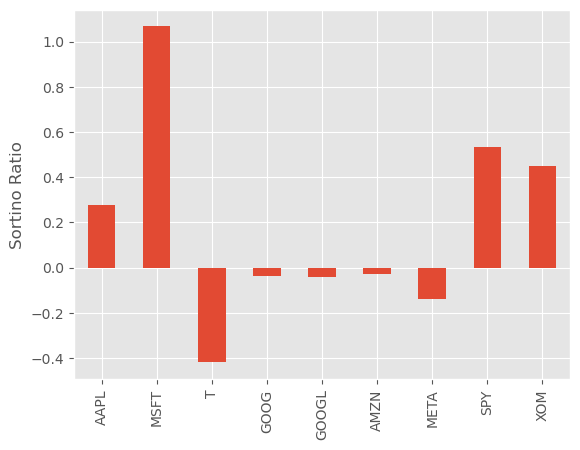

In [174]:
Year=252
Riskless =0.01
def sortino(data, Year,Riskless):
    avg = data.mean() * Year -Riskless
    downside = data[data<0].std()*np.sqrt(Year)
    return avg/downside

sortinos = hh_portfolio.apply(sortino, args=(Year,Riskless,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

In [175]:
start_date = pd.Timestamp("2017-10-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-07", tz="America/New_York").isoformat()

timeframe = "1Day"
tickers = ["AAPL","MSFT","T","GOOG","GOOGL","AMZN","META","SPY","XOM"]

heavy_hitters_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

APPL_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='AAPL'].drop('symbol', axis=1)
MSFT_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='MSFT'].drop('symbol', axis=1)
T_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='T'].drop('symbol', axis=1)
GOOG_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='GOOG'].drop('symbol', axis=1)
GOOGL_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='GOOGL'].drop('symbol', axis=1)
AMZN_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='AMZN'].drop('symbol', axis=1)
META_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='META'].drop('symbol', axis=1)
SPY_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='SPY'].drop('symbol', axis=1)
XOM_5 = heavy_hitters_df[heavy_hitters_df['symbol']=='XOM'].drop('symbol', axis=1)


heavy_hitters_df = pd.concat([APPL_5,MSFT_5,T_5,GOOG_5,GOOGL_5,AMZN_5,META_5,SPY_5,XOM_5],axis=1, keys=('AAPL','MSFT','T','GOOG','GOOGL','AMZN','META','SPY','XOM'))

num_sims = 200

SIM= MCSimulation(
    portfolio_data= heavy_hitters_df,
    num_simulation = num_sims,
    weights= [.12,.11,.11,.11,.11,.11,.11,.11,.11],
    num_trading_days = 252 * 30
)

# Printing the simulation input data
MC=SIM.portfolio_data.head()
MC

AAPL                                      \
                              open    high       low   close    volume   
timestamp                                                                
2017-10-09 04:00:00+00:00  155.810  156.73  155.4850  155.84  16314214   
2017-10-10 04:00:00+00:00  156.055  158.00  155.1000  155.90  15617189   
2017-10-11 04:00:00+00:00  155.970  156.98  155.7500  156.55  16987251   
2017-10-12 04:00:00+00:00  156.360  157.37  155.7299  156.00  16396882   
2017-10-13 04:00:00+00:00  156.730  157.28  156.4100  156.99  16394190   

                                                                 MSFT         \
                          trade_count        vwap daily_return   open   high   
timestamp                                                                      
2017-10-09 04:00:00+00:00      101898  155.996018          NaN  75.97  76.55   
2017-10-10 04:00:00+00:00      103893  155.836198     0.000385  76.33  76.63   
2017-10-11 04:00:00+00:00      104338  156.532792     0.004169  76.36  76.46   
2017-10-12 04:00:00+00:00      110707  156.589331    -0.003513  76.49  77.29   
2017-10-13 04:00:00+00:00      102173  156.906386     0.006346  77.59  77.87   

                           ...         SPY                 XOM                 \
                           ...        vwap daily_return   open    high    low   
timestamp                  ...                                                  
2017-10-09 04:00:00+00:00  ...  254.099236          NaN  81.84  82.180  81.76   
2017-10-10 04:00:00+00:00  ...  254.400559     0.002366  82.34  82.735  82.09   
2017-10-11 04:00:00+00:00  ...  254.772000     0.001611  82.16  82.740  82.14   
2017-10-12 04:00:00+00:00  ...  254.735611    -0.001451  82.29  82.500  82.17   
2017-10-13 04:00:00+00:00  ...  254.982007     0.001060  82.73  83.080  82.36   

                                                                               
                           close   volume trade_count       vwap daily_return  
timestamp                                                                      
2017-10-09 04:00:00+00:00  82.03  7489884       27408  82.007759          NaN  
2017-10-10 04:00:00+00:00  82.26  7229334       37877  82.430414     0.002804  
2017-10-11 04:00:00+00:00  82.60  7061216       33317  82.539465     0.004133  
2017-10-12 04:00:00+00:00  82.43  6867063       38414  82.375294    -0.002058  
2017-10-13 04:00:00+00:00  82.41  7180046       35923  82.587928    -0.000243  

[5 rows x 72 columns]

In [176]:
SIM.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009182,0.999290,1.001294,0.998650,0.996116,1.013994,1.008961,0.988223,0.990560,0.986393,...,0.991931,0.999741,0.987098,0.998886,1.001678,0.989922,1.010782,1.003231,0.999449,0.992855
2,0.993419,1.000427,1.005595,1.011786,0.984592,1.011904,1.010645,0.986905,0.984829,0.983419,...,0.993229,0.978370,0.993908,0.998621,0.996320,1.004590,0.997828,0.995089,1.012377,0.995160
3,1.005644,1.009598,0.993477,1.023324,0.978509,1.011546,1.033363,0.985171,0.983915,0.972070,...,1.002541,0.967262,0.979589,1.005322,0.995353,1.011122,0.994253,0.978059,1.018410,1.008965
4,1.015438,1.009664,0.988164,1.026364,0.956912,1.019515,1.028700,0.976782,0.976437,0.989182,...,1.013537,0.978197,0.971125,0.994218,1.009218,0.994334,0.991775,0.971105,1.006063,1.008156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.536552,2.637713,6.737994,12.204693,1.847659,6.837951,7.403255,14.355506,13.735814,1.855015,...,12.518972,3.598521,6.674929,6.472125,2.262792,2.236673,21.587687,2.217284,8.102335,15.810602
7557,6.463723,2.659407,6.816818,12.180331,1.847126,6.866752,7.316020,14.319708,13.714861,1.867368,...,12.630715,3.574686,6.727799,6.477815,2.259063,2.232536,21.664505,2.241677,8.170928,15.727995
7558,6.419464,2.674097,6.861774,12.062939,1.820086,6.922741,7.277445,14.373151,13.770770,1.858771,...,12.555629,3.570654,6.667343,6.400015,2.275292,2.239202,21.745657,2.236479,8.074463,15.712920
7559,6.467015,2.692376,6.957628,11.980485,1.859418,6.892996,7.293842,14.254627,13.775511,1.857233,...,12.706776,3.577816,6.643879,6.385830,2.279788,2.227656,21.814763,2.232986,8.076003,15.712667


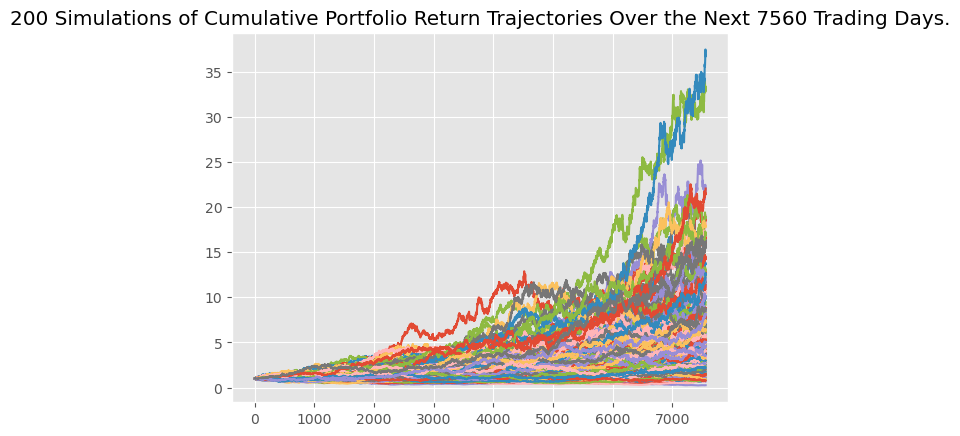

In [177]:
line_plot = SIM.plot_simulation()

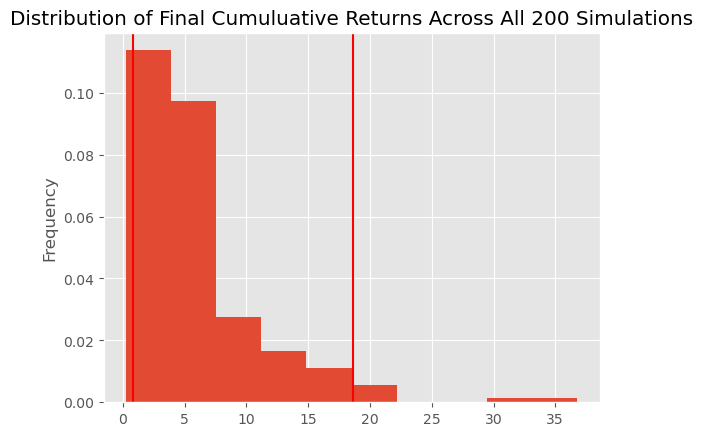

In [178]:
dist_plot = SIM.plot_distribution()

In [179]:
sum_stats = SIM.summarize_cumulative_return()
sum_stats

c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           200.000000
mean              6.082904
std               5.239740
min               0.260789
25%               2.515125
50%               5.040532
75%               7.275582
max              36.757500
95% CI Lower      0.784606
95% CI Upper     18.655368
Name: 7560, dtype: float64

In [180]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower = round(sum_stats[8]*500000,9)
ci_upper = round(sum_stats[9]*500000,9)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 30 years will end within in the range of $392302.971559489 and $9327684.076353166


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

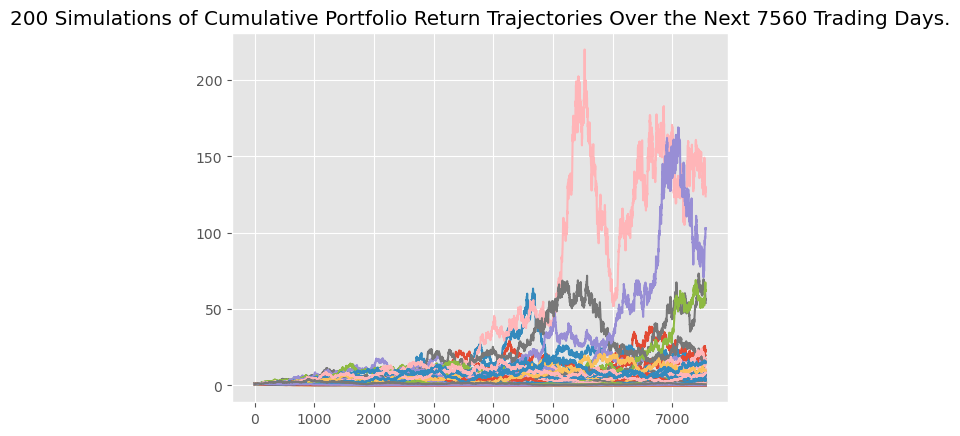

In [181]:
#Below we have more of a position in the SPY AMZN and APPL
SIM_SPY= MCSimulation(
    portfolio_data= heavy_hitters_df,
    num_simulation = 200,
    weights= [.16,.11,.6,.11,.11,.16,.6,.18,.4],
    num_trading_days = 252 * 30
)

# Printing the simulation input data
MC_SPY=SIM_SPY.portfolio_data.head()
MC_SPY
line_plot_safe = SIM_SPY.plot_simulation()


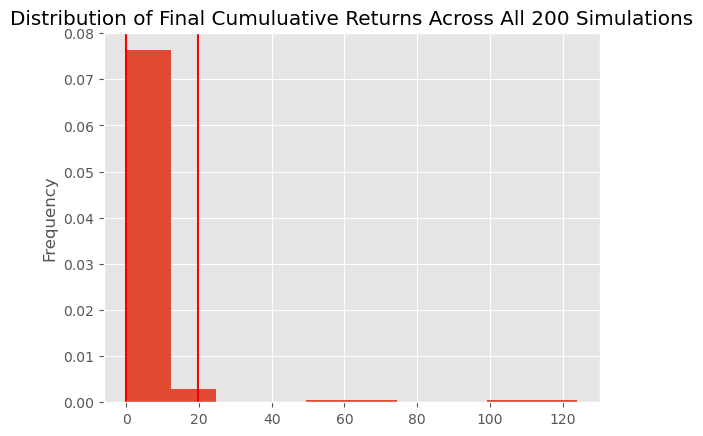

In [182]:
dist_plot_safer = SIM_SPY.plot_distribution()


In [183]:
sum_stats_safer = SIM_SPY.summarize_cumulative_return()
sum_stats_safer


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           200.000000
mean              3.578397
std              12.989848
min               0.003356
25%               0.129746
50%               0.487856
75%               1.977224
max             123.879433
95% CI Lower      0.012049
95% CI Upper     19.802391
Name: 7560, dtype: float64

In [184]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower = round(sum_stats_safer[8]*500000,9)
ci_upper = round(sum_stats_safer[9]*500000,9)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}."
      "As we can tell going to heavy on one stop can drastically affect the portfolio to help us"
      f"get a better understanding of our simulation lets allow our Simulation to help us choose.")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 30 years will end within in the range of $6024.323561064 and $9901195.373486232.As we can tell going to heavy on one stop can drastically affect the portfolio to help usget a better understanding of our simulation lets allow our Simulation to help us choose.


<AxesSubplot: title={'center': 'Simulated Daily Returns of our Portfolio'}>

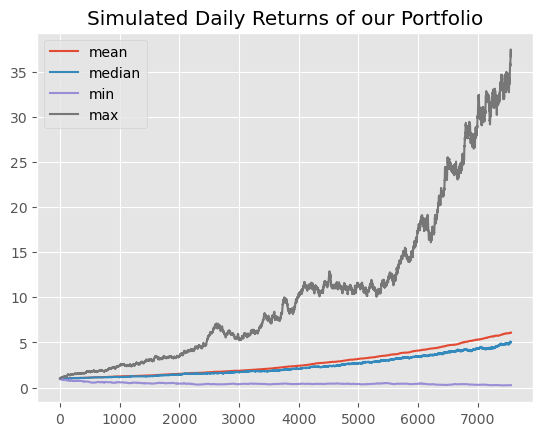

In [185]:
simulated_returns_data={
    "mean": list(SIM.simulated_return.mean(axis=1)),
    "median": list(SIM.simulated_return.median(axis=1)),
    "min": list(SIM.simulated_return.min(axis=1)),
    "max": list(SIM.simulated_return.max(axis=1)),
}
simulated_returns_data=pd.DataFrame(simulated_returns_data)
simulated_returns_data.plot(title="Simulated Daily Returns of our Portfolio")

<AxesSubplot: title={'center': 'Simulated Daily Returns of our Portfolio'}>

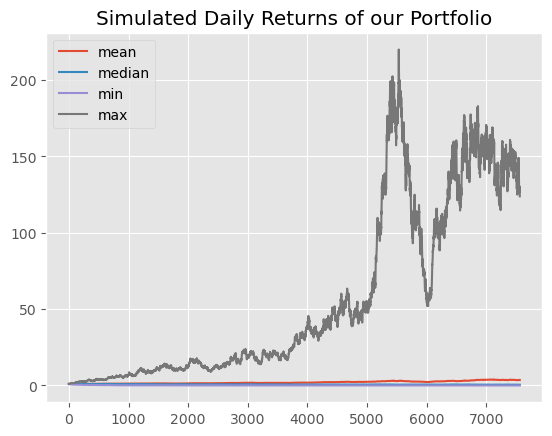

In [186]:
SPY_sim_returns_data={
    "mean": list(SIM_SPY.simulated_return.mean(axis=1)),
    "median": list(SIM_SPY.simulated_return.median(axis=1)),
    "min": list(SIM_SPY.simulated_return.min(axis=1)),
    "max": list(SIM_SPY.simulated_return.max(axis=1)),
}
SPY_sim_returns_data=pd.DataFrame(SPY_sim_returns_data)
SPY_sim_returns_data.plot(title="Simulated Daily Returns of our Portfolio")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\Projects\QA_and_Projections\MCForecastTools.py:117:

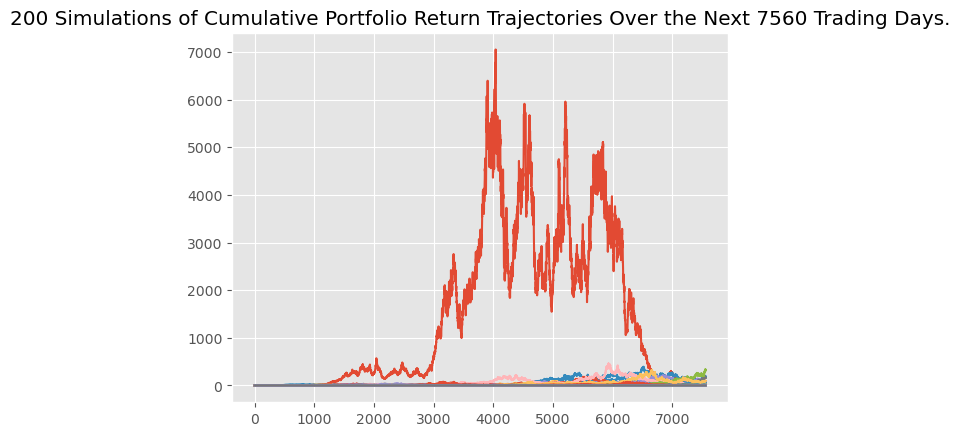

In [187]:
#Below we have more of a position in the SPY AMZN and APPL
SIM_SPY2= MCSimulation(
    portfolio_data= heavy_hitters_df,
    num_simulation = 200,
    weights= [.16,.18,.6,.4,.6,.16,.6,.18,.9],
    num_trading_days = 252 * 30
)

# Printing the simulation input data
MC_SPY2=SIM_SPY2.portfolio_data.head()
MC_SPY2
line_plot_safe = SIM_SPY2.plot_simulation()

<AxesSubplot: title={'center': 'SimulatednDaily Returns Behavior of our Portfolio with adjusted weights'}>

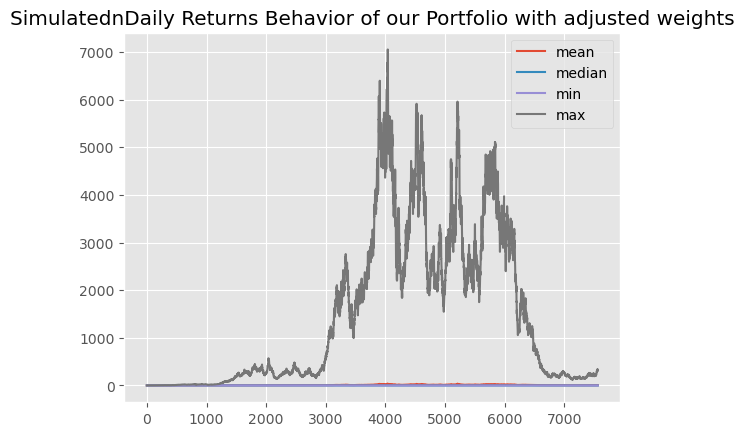

In [188]:
SPY2_sim_returns_data={
    "mean": list(SIM_SPY2.simulated_return.mean(axis=1)),
    "median": list(SIM_SPY2.simulated_return.median(axis=1)),
    "min": list(SIM_SPY2.simulated_return.min(axis=1)),
    "max": list(SIM_SPY2.simulated_return.max(axis=1)),
}

SPY2_sim=pd.DataFrame(SPY2_sim_returns_data)
SPY2_sim.plot(title="SimulatednDaily Returns Behavior of our Portfolio with adjusted weights")
